<a href="https://colab.research.google.com/github/Kavindu-D/Census_Income/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the ucimlrepo package


In [1]:
!pip install ucimlrepo

# Importing the dataset from the website

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
data = adult.data.features
target = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Adding target variable to the same dataset for preprocessing

In [3]:
data['income'] = target

# Checking how many null values in each column

In [4]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Checking how many "?" values in each column

In [5]:
data.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

# Total number of cells that needs to be replaced in each column

In [6]:
print(data.isnull().sum() + data.isin(["?"]).sum())
print("TOTAL NO. OF CELLS TO BE REPLACED : ",(data.isnull().sum() + data.isin(["?"]).sum()).sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64
TOTAL NO. OF CELLS TO BE REPLACED :  6465


# Describing the dataset

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#Importing necessarry Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Data Analysis

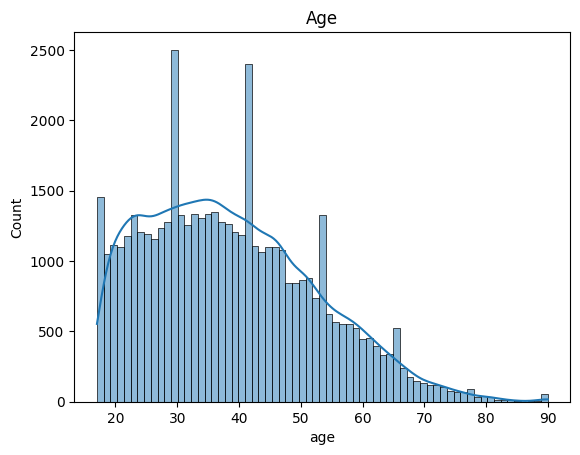

In [9]:
sns.histplot(data = data['age'], kde=True)
plt.title('Age')
plt.show()

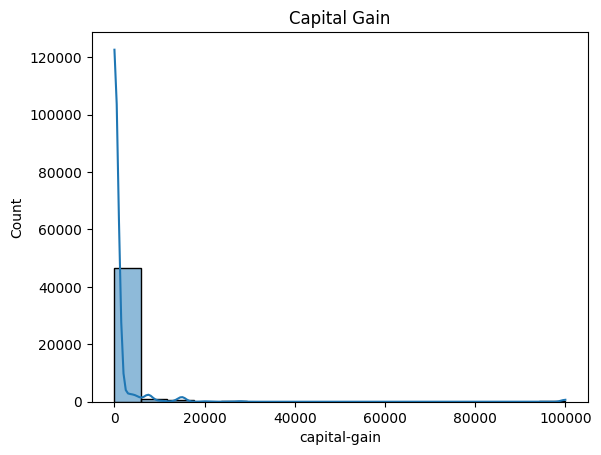

In [10]:
sns.histplot(data = data['capital-gain'], kde=True)
plt.title('Capital Gain')
plt.show()

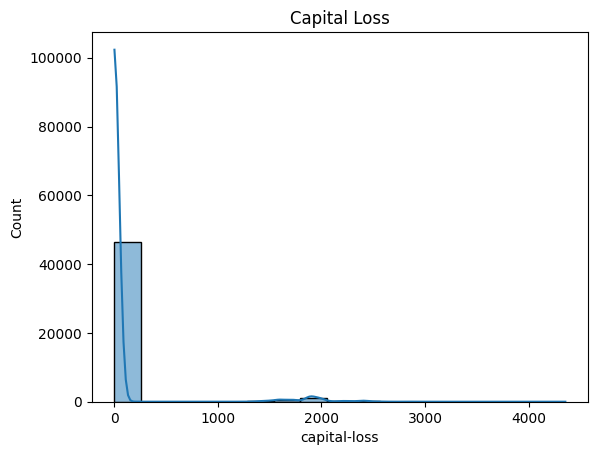

In [11]:
sns.histplot(data = data['capital-loss'], kde=True)
plt.title('Capital Loss')
plt.show()

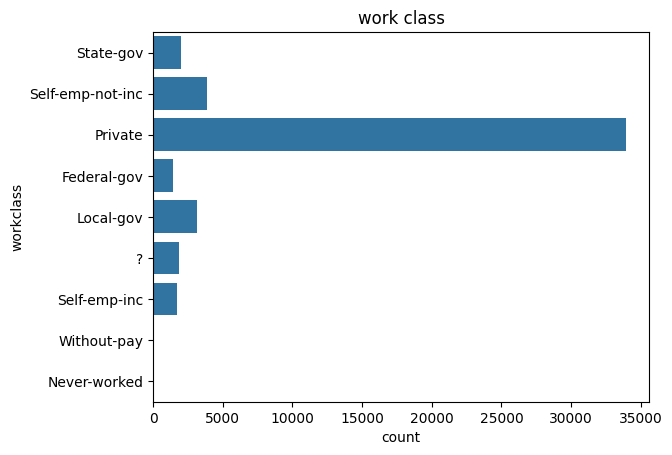

In [12]:
sns.countplot(data = data['workclass'])
plt.title('work class')
plt.show()

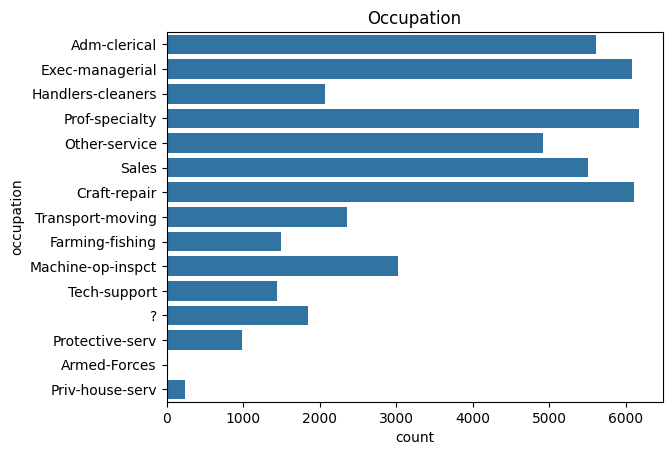

In [13]:
sns.countplot(data = data['occupation'])
plt.title('Occupation')
plt.show()

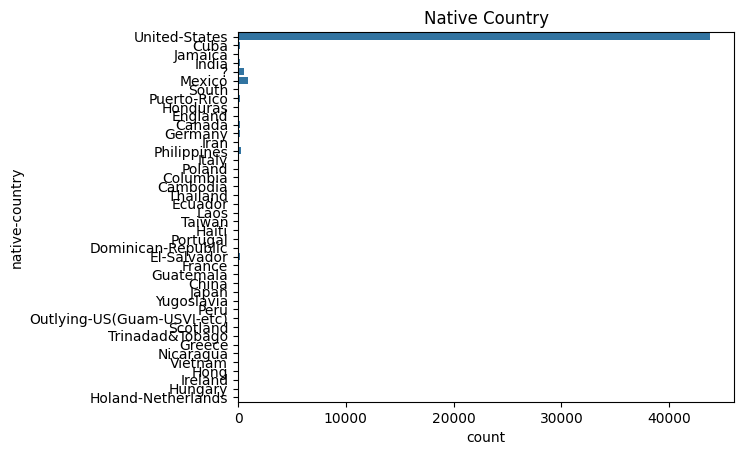

In [14]:
sns.countplot(data = data['native-country'])
plt.title('Native Country')
plt.show()

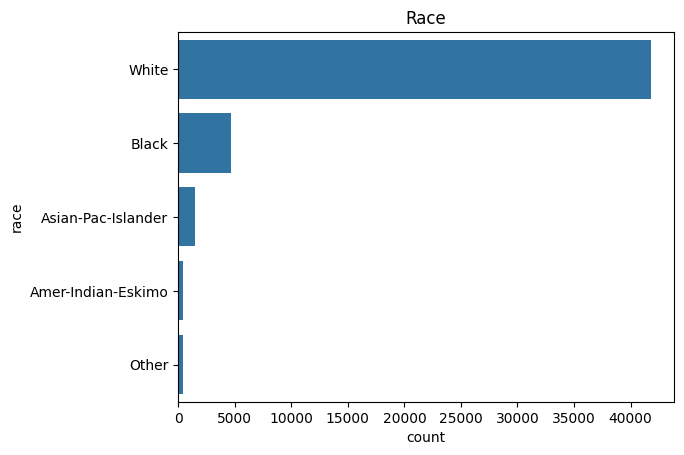

In [15]:
sns.countplot(data = data['race'])
plt.title('Race')
plt.show()

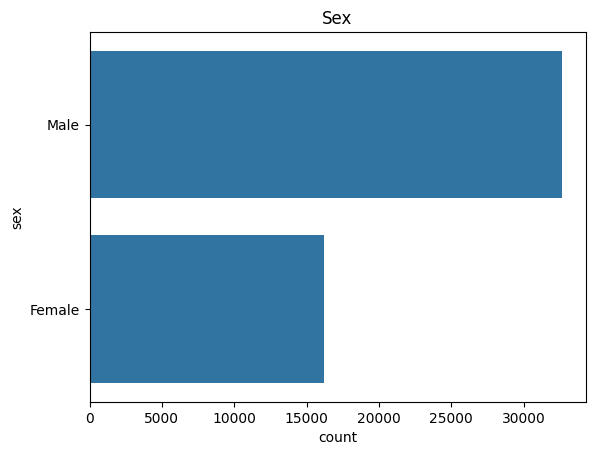

In [16]:
sns.countplot(data = data['sex'])
plt.title('Sex')
plt.show()

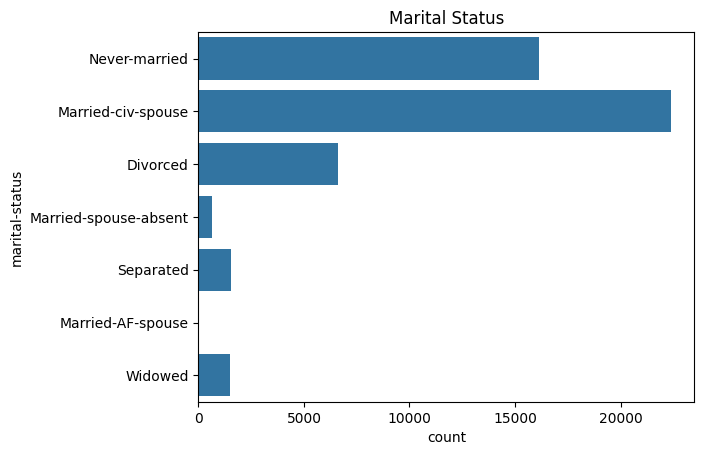

In [17]:
sns.countplot(data = data['marital-status'])
plt.title('Marital Status')
plt.show()

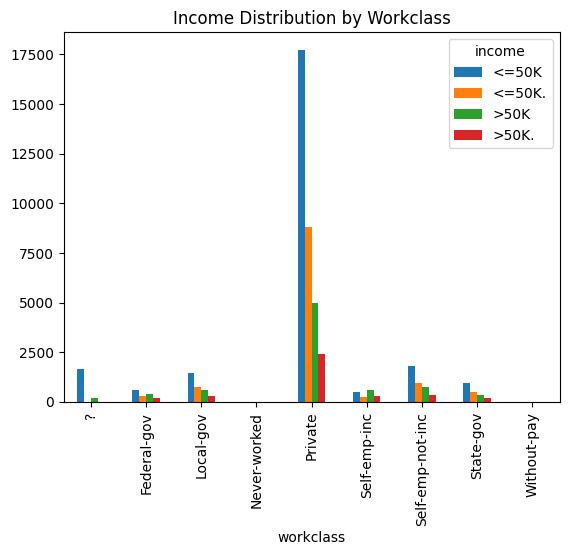

In [18]:
pd.crosstab(data['workclass'], data['income']).plot(kind='bar')
plt.title('Income Distribution by Workclass')
plt.show()

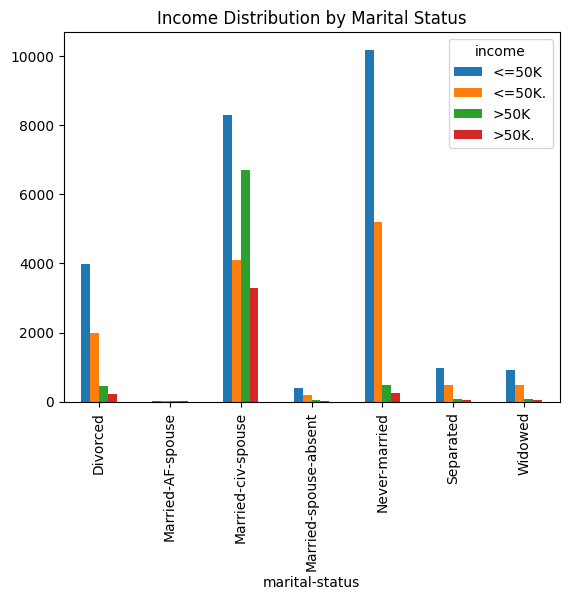

In [19]:
pd.crosstab(data['marital-status'], data['income']).plot(kind='bar')
plt.title('Income Distribution by Marital Status')
plt.show()

### checking for correlations

<Axes: >

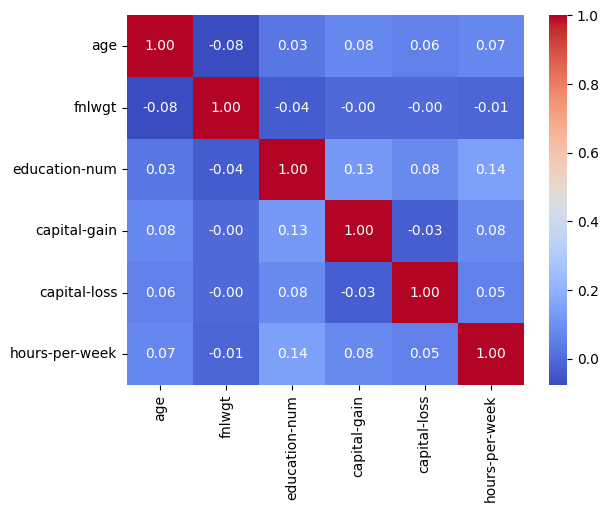

In [20]:
sns.heatmap(data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Detecting Outliers

###Age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week(Columns with Integers only)

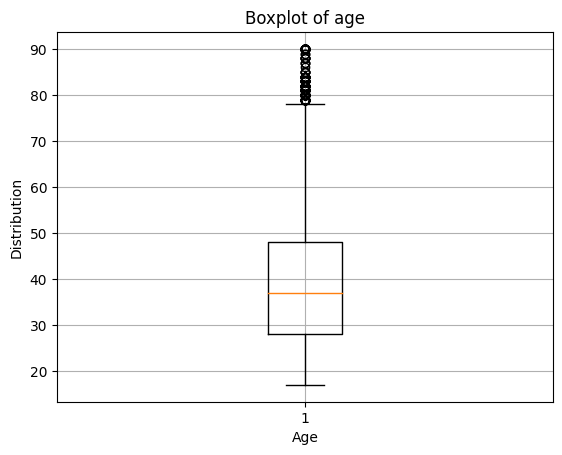

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [21]:
plt.boxplot(data['age'])
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

data['age'].describe()

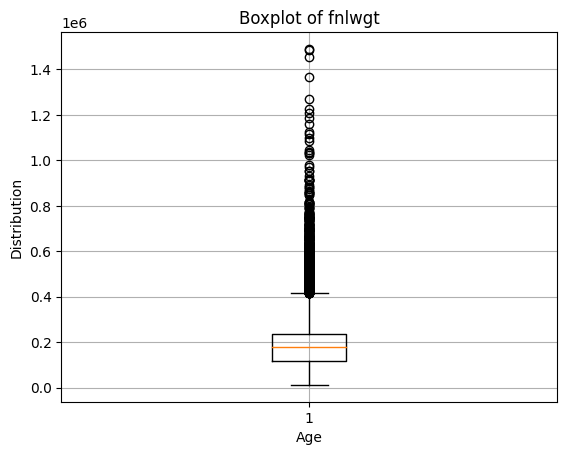

In [22]:
plt.boxplot(data['fnlwgt'])
plt.title('Boxplot of fnlwgt')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

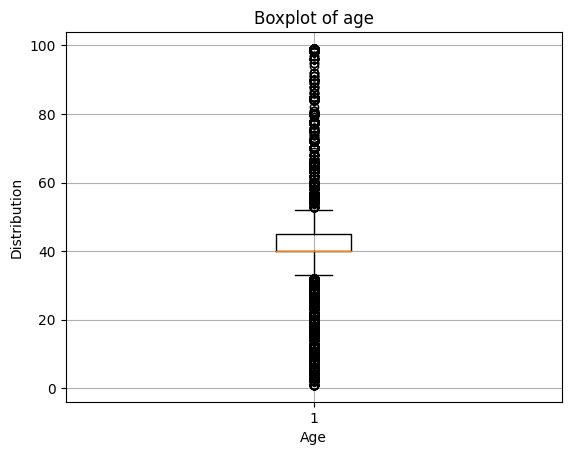

In [23]:
plt.boxplot(data['hours-per-week'])
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

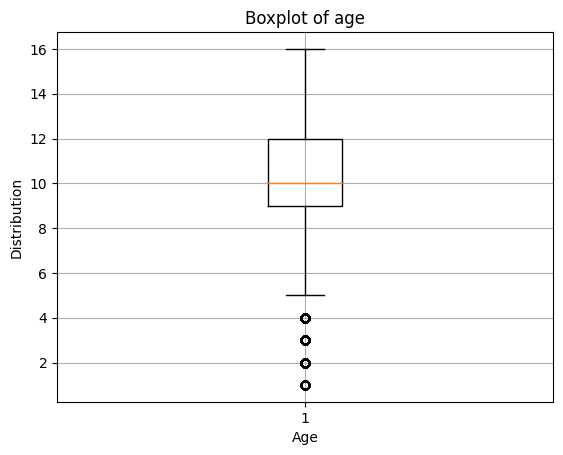

In [24]:
plt.boxplot(data['education-num'])
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [25]:
q1 = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].quantile(0.25)
q3 = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].quantile(0.75)
iqr = q3 - q1

threshold = 1.5
outliers = data[(data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] < q1 - threshold * iqr) | (data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] > q3 + threshold * iqr)]
print(outliers.count())

age                 216
workclass             0
fnlwgt             1453
education             0
education-num      1794
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain       4035
capital-loss       2282
hours-per-week    13496
native-country        0
income                0
dtype: int64


In [26]:
data.shape[0]

48842

In [27]:
q1_age = data['age'].quantile(0.25)
q3_age = data['age'].quantile(0.75)
iqr_age = q3_age - q1_age

threshold_age = 1.5
age_outliers_mask = (data['age'] < (q1_age - threshold_age * iqr_age)) | (data['age'] > (q3_age + threshold_age * iqr_age))

outliers = data[age_outliers_mask]
print(outliers.count())

data = data.drop(outliers.index)

age               216
workclass         202
fnlwgt            216
education         216
education-num     216
marital-status    216
occupation        202
relationship      216
race              216
sex               216
capital-gain      216
capital-loss      216
hours-per-week    216
native-country    214
income            216
dtype: int64


In [28]:
data.shape[0]

48626

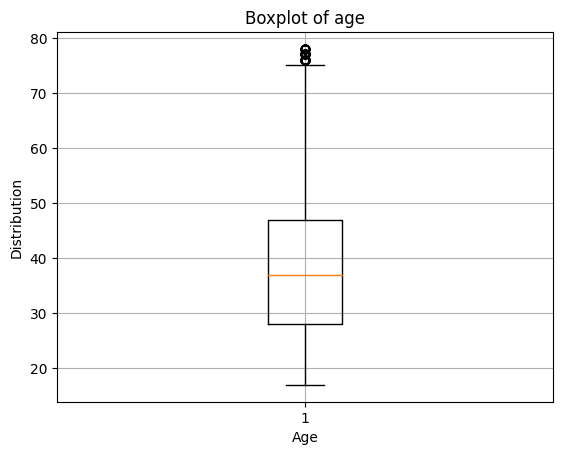

count    48626.000000
mean        38.443631
std         13.404926
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         78.000000
Name: age, dtype: float64

In [29]:
plt.boxplot(data['age'])
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

data['age'].describe()

In [30]:
print(data['hours-per-week'].unique())

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]


# Replacing and Reomving Data

### Replacing Null Values with Mode of the Colunm

In [31]:
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

In [32]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Replacing '?' Values with Mode of the Colunm

In [33]:
data['workclass'].replace('?', data['workclass'].mode()[0], inplace=True)
data['occupation'].replace('?', data['occupation'].mode()[0], inplace=True)
data['native-country'].replace('?', data['native-country'].mode()[0], inplace=True)

In [34]:
data.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Duplicates handling

In [35]:
print(data.duplicated().sum())

data = data.drop_duplicates()

28


In [36]:
print(data.duplicated().sum())

0


In [37]:
print(data['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [38]:
data['income'].replace('<=50K.', '<=50K', inplace=True)
data['income'].replace('>50K.', '>50K', inplace=True)

In [39]:
print(data['income'].unique())

['<=50K' '>50K']


In [40]:
print(data['income'])

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48598, dtype: object


# Checking the feature importance using correlation

In [41]:
for col, value in data.items():
  print(col)
  print(value.unique())
  print()

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 27 67 33 76 17 55 61 70 64 71 68 66
 51 58 26 60 75 65 77 62 63 72 74 69 73 78]

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-ser

# Catogerizing the columns(Marital-status, hours-per-week and workclass)

In [42]:
# Catogerizing workclass
def workClass_ctg(workclass):
  if workclass in ['State-gov', 'Federal-gov', 'Local-gov']:
    return 'Gov'
  elif workclass in ['Self-emp-not-inc',  'Self-emp-inc']:
    return 'Self-Employed'
  elif workclass in ['Without-pay', 'Never-worked']:
    return 'Unemployed'
  else:
    return 'Private'

# Adding a new column to the dataset
data['catorized_Workclass'] = data['workclass'].apply(workClass_ctg)

# Catogerizing hours-per-week
def hours_Per_Week_ctg(hours):
  if hours>= 35:
    return 'Full-Time'
  else:
    return 'Part-Time'

# Adding a new column to the dataset
data['catorized_Hours'] = data['hours-per-week'].apply(hours_Per_Week_ctg)

# Catogerizing marital-Status
def status_ctg(stats):
  if stats in ['Married-civ-spouse', 'Married-spouse-absent','Married-AF-spouse']:
    return 'Married'
  else:
    return 'Single'

# Adding a new column to the dataset
data['catorized_Marital_Status'] = data['marital-status'].apply(status_ctg)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,catorized_Workclass,catorized_Hours,catorized_Marital_Status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Gov,Full-Time,Single
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-Employed,Part-Time,Married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,Full-Time,Single
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,Full-Time,Married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Full-Time,Married


In [43]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       48598 non-null  int64 
 1   workclass                 48598 non-null  object
 2   fnlwgt                    48598 non-null  int64 
 3   education                 48598 non-null  object
 4   education-num             48598 non-null  int64 
 5   marital-status            48598 non-null  object
 6   occupation                48598 non-null  object
 7   relationship              48598 non-null  object
 8   race                      48598 non-null  object
 9   sex                       48598 non-null  object
 10  capital-gain              48598 non-null  int64 
 11  capital-loss              48598 non-null  int64 
 12  hours-per-week            48598 non-null  int64 
 13  native-country            48598 non-null  object
 14  income                

# Label Encoding data

In [44]:
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Columns to be encoded
column = ['occupation', 'relationship', 'race', 'sex', 'catorized_Workclass', 'catorized_Hours', 'catorized_Marital_Status', 'income','native-country', 'education']

label_encoders = {}

# Econding the values
for col in column:
  if col in data.columns:
    label_enc = LabelEncoder()
    data[col] = label_enc.fit_transform(data[col])
    label_encoders[col] = label_enc

# Save encoded values with true values to a text file
with open("/content/drive/MyDrive/ML_CW/encoded_values.txt", "w")  as f:
    for col, encoder in label_encoders.items():
        f.write(f"{col}:\n")
        for label, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
            f.write(f"{label}: {encoded_value}\n")
        f.write("\n")

print(data.head())

Mounted at /content/drive
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516          9             13   
1   50  Self-emp-not-inc   83311          9             13   
2   38           Private  215646         11              9   
3   53           Private  234721          1              7   
4   28           Private  338409          9             13   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0       Never-married           0             1     4    1          2174   
1  Married-civ-spouse           3             0     4    1             0   
2            Divorced           5             1     4    1             0   
3  Married-civ-spouse           5             0     2    1             0   
4  Married-civ-spouse           9             5     2    0             0   

   capital-loss  hours-per-week  native-country  income  catorized_Workclass  \
0             0              40              38       0         

<Axes: >

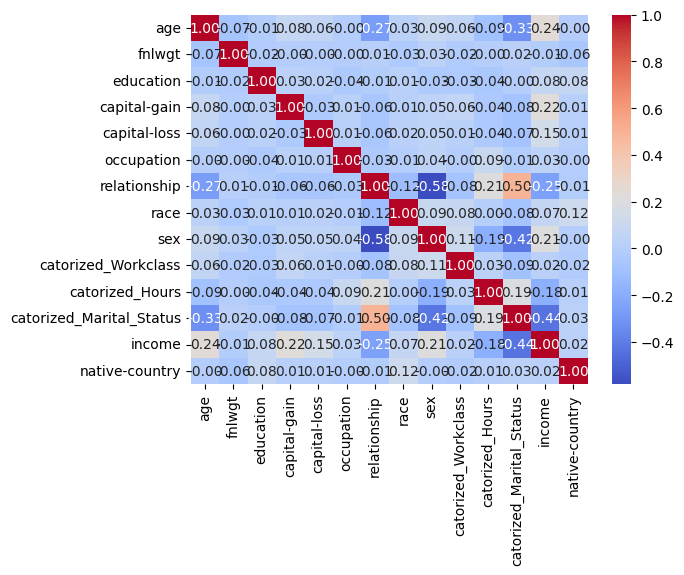

In [45]:
sns.heatmap(data[['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss', 'occupation', 'relationship', 'race', 'sex', 'catorized_Workclass', 'catorized_Hours', 'catorized_Marital_Status', 'income', 'native-country' ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Checking feature importance

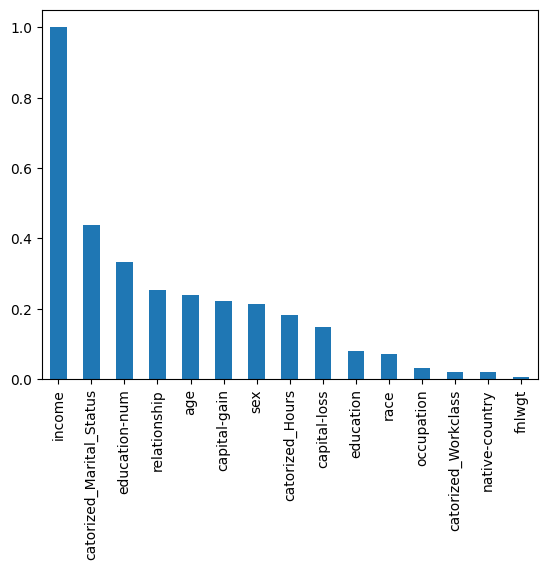

In [46]:
correlation = data[['age', 'fnlwgt', 'education','education-num', 'capital-gain', 'capital-loss', 'occupation', 'relationship', 'race', 'sex', 'catorized_Workclass', 'catorized_Hours', 'catorized_Marital_Status', 'income', 'native-country' ]].corr()

corr_to_income = correlation['income'].abs().sort_values(ascending=False)

# Plotting the graph
corr_to_income.plot(kind = 'bar')
plt.show()


# Dropping the unncessary columns

In [47]:
# Droping the 'fnlwgt' column and 'Native-Country'
data = data.drop(['fnlwgt', 'native-country'], axis = 1)

data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,catorized_Workclass,catorized_Hours,catorized_Marital_Status
0,39,State-gov,9,13,Never-married,0,1,4,1,2174,0,40,0,0,0,1
1,50,Self-emp-not-inc,9,13,Married-civ-spouse,3,0,4,1,0,0,13,0,2,1,0
2,38,Private,11,9,Divorced,5,1,4,1,0,0,40,0,1,0,1
3,53,Private,1,7,Married-civ-spouse,5,0,2,1,0,0,40,0,1,0,0
4,28,Private,9,13,Married-civ-spouse,9,5,2,0,0,0,40,0,1,0,0


In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       48598 non-null  int64 
 1   workclass                 48598 non-null  object
 2   education                 48598 non-null  int64 
 3   education-num             48598 non-null  int64 
 4   marital-status            48598 non-null  object
 5   occupation                48598 non-null  int64 
 6   relationship              48598 non-null  int64 
 7   race                      48598 non-null  int64 
 8   sex                       48598 non-null  int64 
 9   capital-gain              48598 non-null  int64 
 10  capital-loss              48598 non-null  int64 
 11  hours-per-week            48598 non-null  int64 
 12  income                    48598 non-null  int64 
 13  catorized_Workclass       48598 non-null  int64 
 14  catorized_Hours       

In [49]:
print(data['income'].value_counts())

0    36951
1    11647
Name: income, dtype: int64


# Deleting the columns that i have catogerized

In [50]:
data = data.drop('workclass', axis=1)

data = data.drop('marital-status', axis=1)

data = data.drop('hours-per-week', axis=1)


# Oversampling


In [51]:
from imblearn.over_sampling import SMOTE

# Dividing the target column separately
target = data['income']
features = data.drop('income', axis=1)

# Initializing the sampling method and random state
sm = SMOTE(random_state = 42)

# Resampling
features_sm, target_sm = sm.fit_resample(features, target)

# Rearragning the dataset by concatinating the target with the features
data = pd.concat([features_sm, target_sm], axis = 1)

In [52]:
data.shape[0]

73902

In [53]:
print(data['income'].value_counts())

0    36951
1    36951
Name: income, dtype: int64


In [54]:
data.head()

,age,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,catorized_Workclass,catorized_Hours,catorized_Marital_Status,income
0,39,9,13,0,1,4,1,2174,0,0,0,1,0
1,50,9,13,3,0,4,1,0,0,2,1,0,0
2,38,11,9,5,1,4,1,0,0,1,0,1,0
3,53,1,7,5,0,2,1,0,0,1,0,0,0
4,28,9,13,9,5,2,0,0,0,1,0,0,0


In [55]:
data.tail()

,age,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,catorized_Workclass,catorized_Hours,catorized_Marital_Status,income
73897,28,11,9,11,0,4,1,0,0,1,0,0,1
73898,40,15,10,6,0,3,1,0,0,1,0,0,1
73899,59,15,10,3,0,4,1,0,0,1,0,0,1
73900,46,9,13,7,1,4,0,99999,0,1,0,1,1
73901,28,15,10,10,0,4,1,0,0,0,0,0,1


<Axes: >

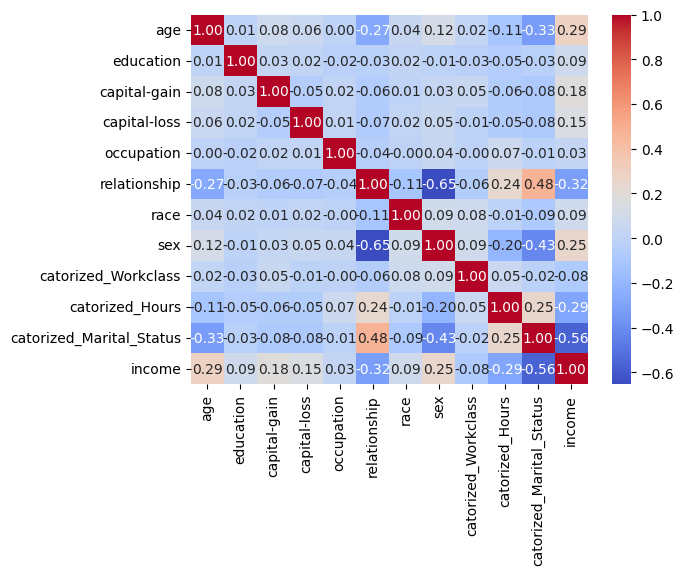

In [56]:
sns.heatmap(data[['age', 'education', 'capital-gain', 'capital-loss', 'occupation', 'relationship', 'race', 'sex', 'catorized_Workclass', 'catorized_Hours', 'catorized_Marital_Status', 'income']].corr(), annot=True, cmap='coolwarm', fmt=".2f")


In [57]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73902 entries, 0 to 73901
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       73902 non-null  int64
 1   education                 73902 non-null  int64
 2   education-num             73902 non-null  int64
 3   occupation                73902 non-null  int64
 4   relationship              73902 non-null  int64
 5   race                      73902 non-null  int64
 6   sex                       73902 non-null  int64
 7   capital-gain              73902 non-null  int64
 8   capital-loss              73902 non-null  int64
 9   catorized_Workclass       73902 non-null  int64
 10  catorized_Hours           73902 non-null  int64
 11  catorized_Marital_Status  73902 non-null  int64
 12  income                    73902 non-null  int64
dtypes: int64(13)
memory usage: 7.3 MB
None


In [58]:
# Saving the final preprocessed data file to google drive for later usage
data.to_excel('/content/drive/MyDrive/ML_CW/preprocessed_dataset.xlsx', index=False)